<a href="https://colab.research.google.com/github/fauziahs13/portfolio_Dec2024/blob/main/Linear_Regression_and_Data_Visualisation_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
print(data.shape)
print(data.isna().values.any())
print(data.duplicated().values.any())
data.info()

(5391, 6)
False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [ ]:
print(data.duplicated().values.sum())
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0


0

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$', "")
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',', "")
data.USD_Production_Budget = pd.to_numeric(data['USD_Production_Budget'])
print(type(data.USD_Production_Budget[0]))
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$', "")
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace(',', "")
data.USD_Worldwide_Gross = pd.to_numeric(data['USD_Worldwide_Gross'])
print(type(data.USD_Worldwide_Gross[0]))
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$', "")
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace(',', "")
data.USD_Domestic_Gross = pd.to_numeric(data['USD_Domestic_Gross'])
print(type(data.USD_Domestic_Gross[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])
    print(type(data[col][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data.Release_Date = pd.to_datetime(data['Release_Date'])
print(type(data.Release_Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].describe()

,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00"
mean,"31,113,737.58","88,855,421.96","41,235,519.44"
std,"40,523,796.88","168,457,757.00","66,029,346.27"
min,"1,100.00",0.00,0.00
25%,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"425,000,000.00","2,783,918,982.00","936,662,225.00"


1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?

= The average film costs about USD31m to make and makes around 3x that (or ~USD89m) in worldwide revenue. So that's encouraging.

3. What were the minimums for worldwide and domestic revenue?

= The minimum domestic and worldwide revenue is $0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

4. Are the bottom 25% of films actually profitable or do they lose money?

= But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is USD5 million and they only bring in USD3.8m in worldwide revenue!

5. What are the highest production budget and highest worldwide gross revenue of any film?

= On the other hand, the highest production budget was $425,000,000 and the highest worldwide revenue was USD2,783,918,982. USD2.7 Billion revenue! Holy smokes.


In [ ]:
budget_sort = data.sort_values('USD_Production_Budget', ascending=False)
budget_sort

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0


In [ ]:
profit_lowest_budget = budget_sort.tail(1)
print(profit_lowest_budget)
profit_highest_budget = budget_sort.head(1)
profit_highest_budget

      Rank Release_Date  ... USD_Worldwide_Gross  USD_Domestic_Gross
2427  5391   2005-05-08  ...              181041              181041

[1 rows x 6 columns]


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


6. How much revenue did the lowest and highest budget films make?

= I've ... never heard of this film. But it looks like a real money maker. It grossed USD181,041 with a measly $1,100 budget. 😮 Wow. Talk about return on investment!

= Sigh, I remember watching this film in the cinema with 3D glasses 🤓 and not wanting the film to ever end! I would have been quite content living with those blue people. 😊

In [ ]:
data[data['USD_Production_Budget'] == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [ ]:
data[data['USD_Production_Budget'] == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
# top_1000_budget = budget_sort.head(1000)
# zero_US = top_1000_budget[top_1000_budget['USD_Domestic_Gross'] == 0]
# zero_US

zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically: {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


INSIGHT --> We see that there are **512 films** in the dataset that had no revenue in the United States. However, the highest budget films with no revenue have a release date AFTER the date on which the dataset was compiled (May 1st, 2018).

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
# zero_global = top_1000_budget[top_1000_budget['USD_Worldwide_Gross'] == 0]
# zero_global

zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide : {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide : 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


INSIGHT --> When we check worldwide revenue instead, we see that there are **357 films** that made no money internationally. Once again, some of the films have not been released yet at the time the data was compiled. However, 512 versus 357. Why is there a difference?

The reason some international films were never screened in the United States.  In fact, we can see an example of this in our previous screenshot. "Don Gato, el inicio de la pandilla" made about USD4.5 million dollars in the box office, but nothing in the United States. Perhaps they should have screened it there too, considering it cost $80 million to make!

### Filtering on Multiple Conditions

In [ ]:
# FIRST OPTION
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases : {len(international_releases)}')
international_releases

Number of international releases : 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
# SECOND OPTION
international_releases_2 = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases : {len(international_releases_2)}')
international_releases_2.head()

Number of international releases : 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies : {len(future_releases)}')
future_releases

Number of unreleased movies : 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
data_clean = data.drop(future_releases.Rank)

In [ ]:
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f'Number of films that lost some money : {len(money_losing)}')
# Or
# money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
# len(money_losing)/len(data_clean)

Number of films that lost some money : 2012


In [ ]:
percent_lost_money = (len(money_losing) / len(data_clean)) * 100
print(f'Percentage of films that lost some money : {percent_lost_money}')

Percentage of films that lost some money : 37.36998514115899


INSIGHT --> In both cases, we see that a whopping **37.2%** 😮 of films do not recoup their production budget at the box office. 💸💸💸 Who knew that film finance could be so risky! 😬

# Seaborn for Data Viz: Bubble Charts

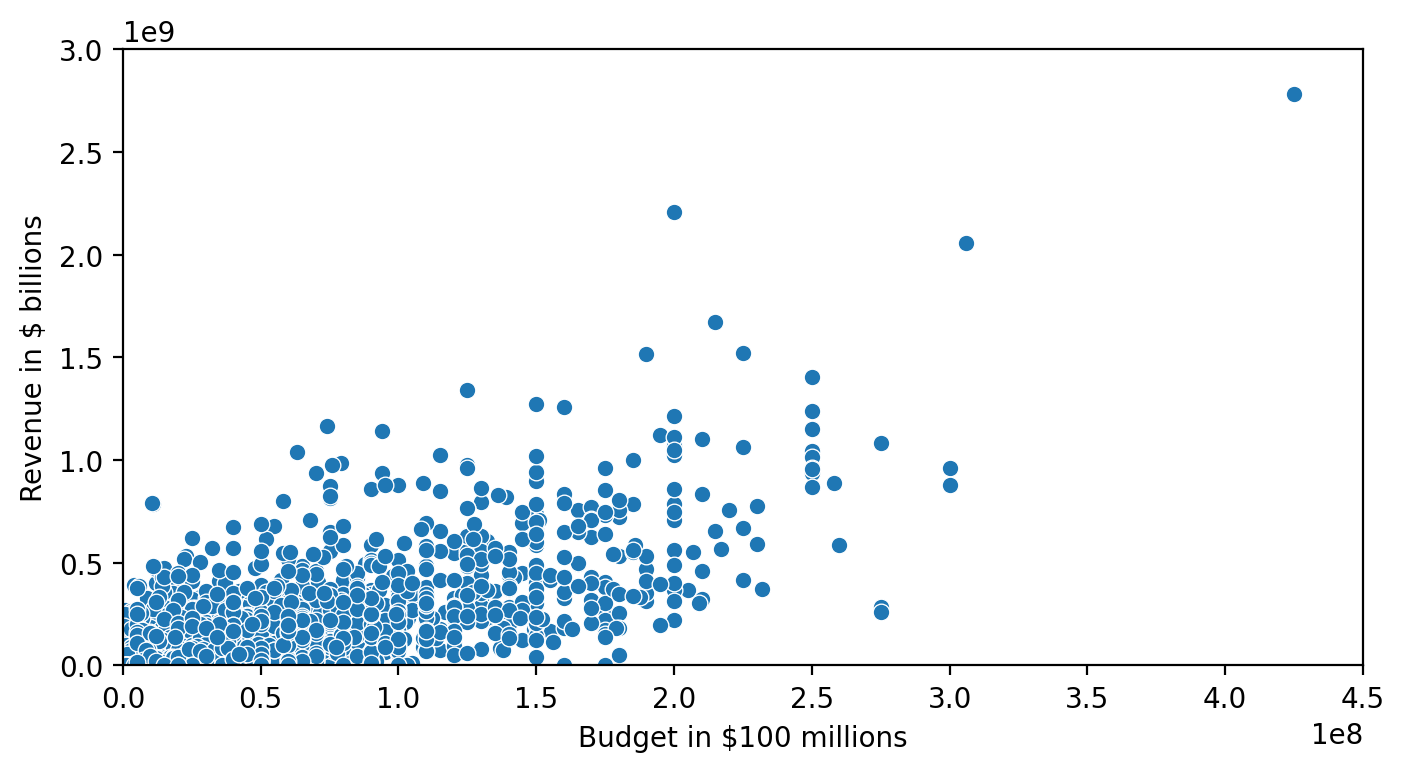

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

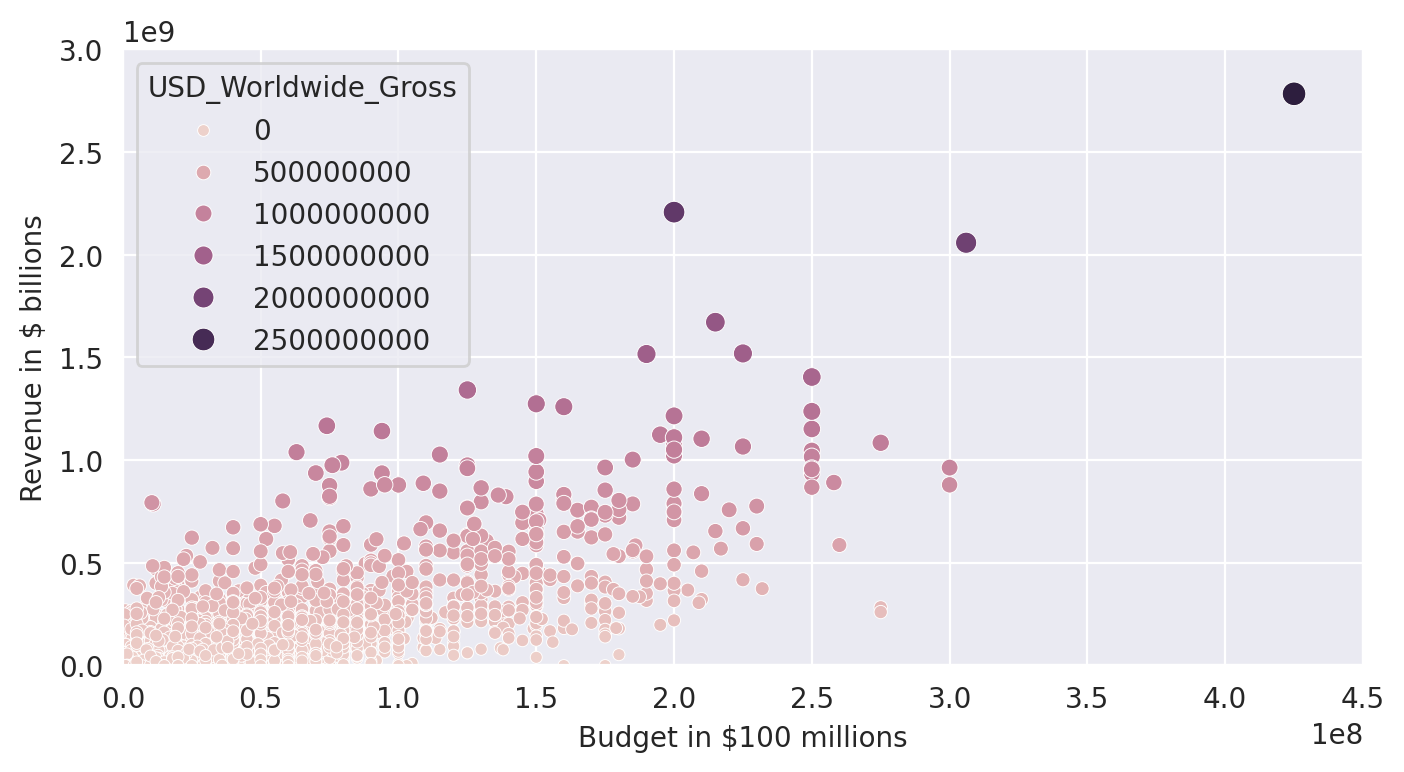

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='USD_Production_Budget',
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',)

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



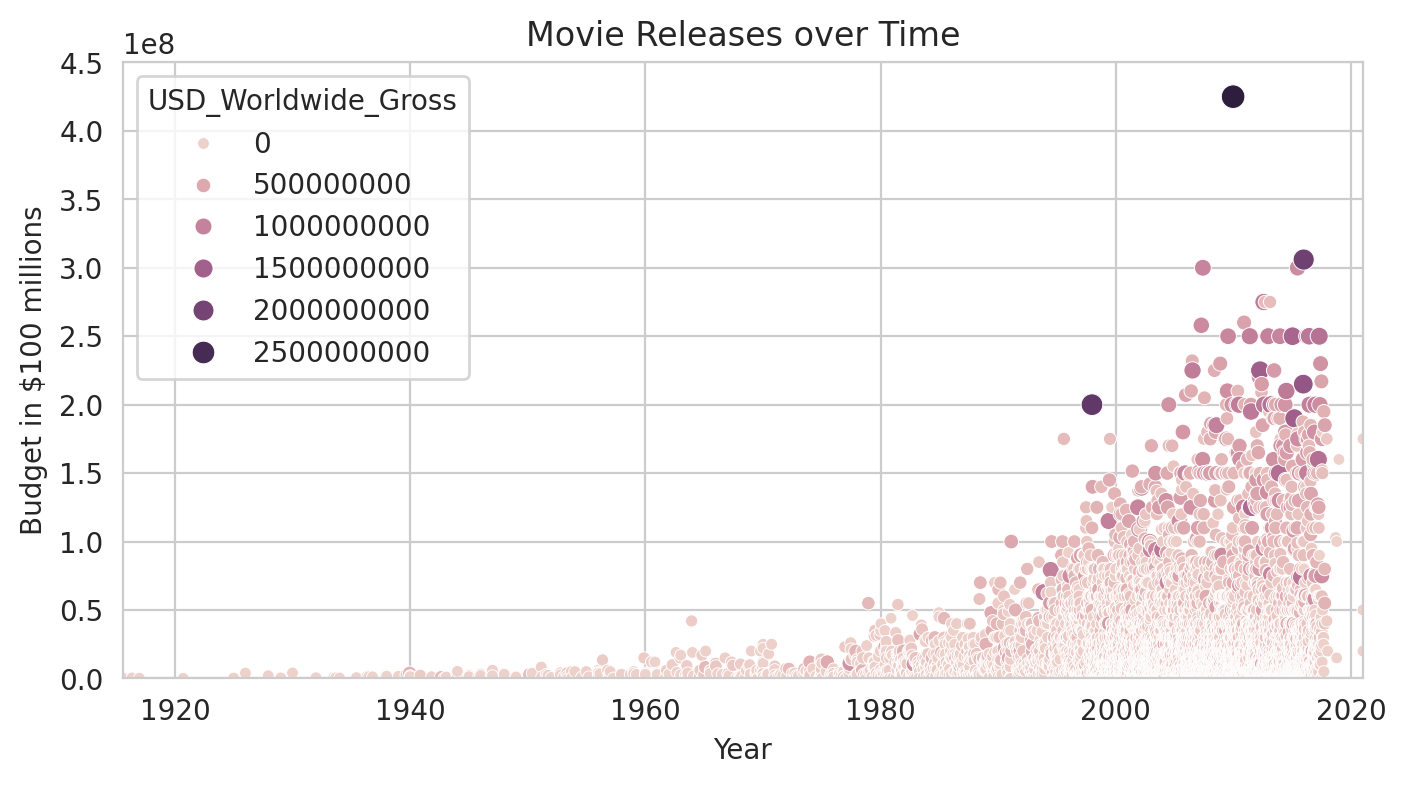

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',
                    )

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

plt.title("Movie Releases over Time")
plt.show()

INSIGHT --> What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. **Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s.** Also, the industry has grown massively, producing many more films than before. **The number of data points is so dense from 2000 onwards that they are overlapping.**

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

In [ ]:
# How to convert the year 1999 to the 90s decade
decades = years//10*10
decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2020, 2020, 2020],
      dtype='int32', name='Release_Date', length=5384)

In [ ]:
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean[data_clean.Decade <= 1960]
len(old_films)

151

In [ ]:
new_films = data_clean[data_clean.Decade > 1960]
len(new_films)

5233

The cut-off for our calculation is 1960 in the Decade column because this will still include 1969. When we inspect our old_films DataFrame we see that it only includes **153 films**. As we saw in the bubble chart, **the bulk of films in the dataset have been released in the last 30 years**.

In [ ]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960


INSIGHT --> The most expensive film prior to 1970 was **Cleopatra**, with a production budget of $42 million. That's some serious 1960s money, and judging by the trailer, a lot of it went into extravagant costumes, set design, and plenty of extras. Impressive.

# Seaborn Regression Plots

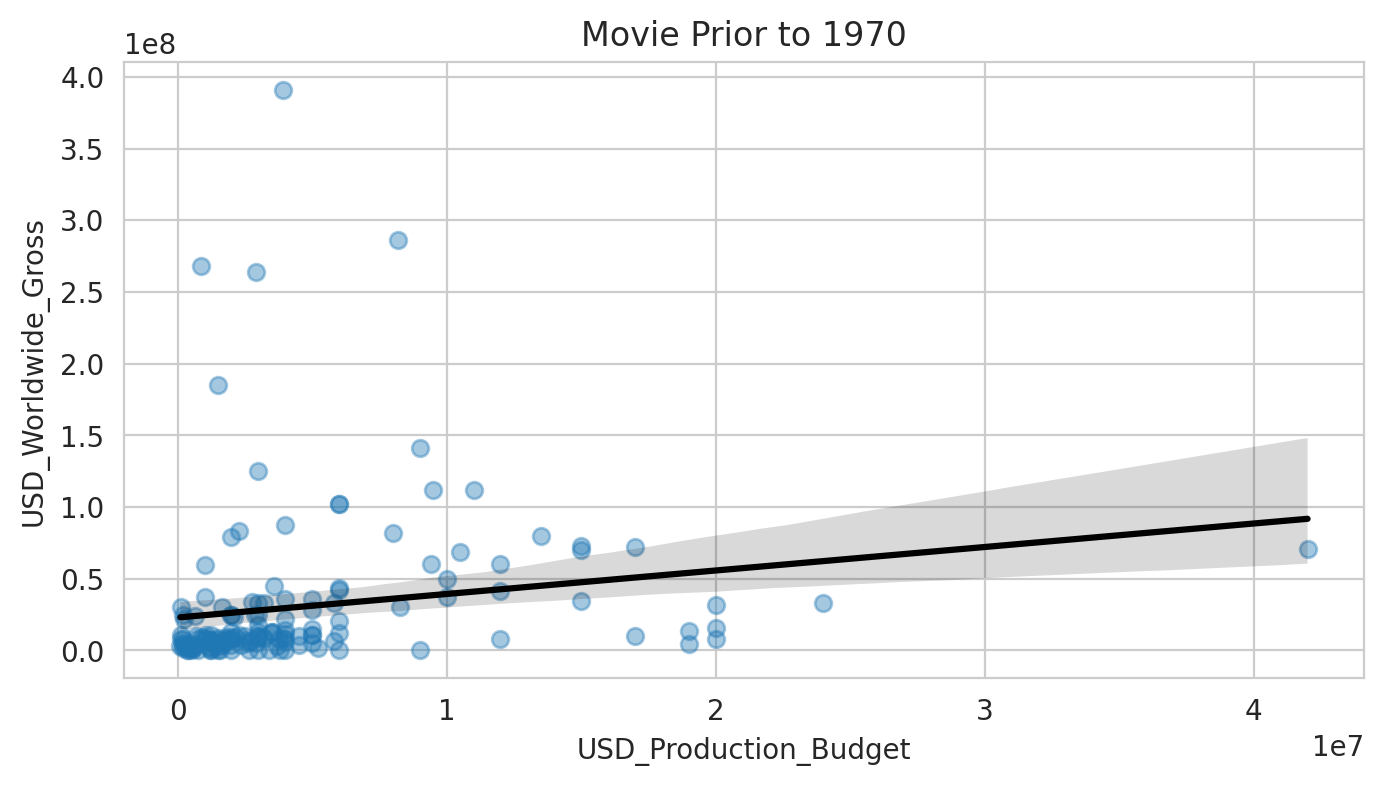

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

plt.title("Movie Prior to 1970")
plt.show()

INSIGHT --> What do we see here? Well, first off we can spot **Cleopatra** on the far right. But also, we see that many lower budget films made much more money! **The relationship between the production budget and movie revenue is not very strong**. Many points on the left are very far away for the line, so the **line appears not to capture the relationship between budget and revenue very well at all**!

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

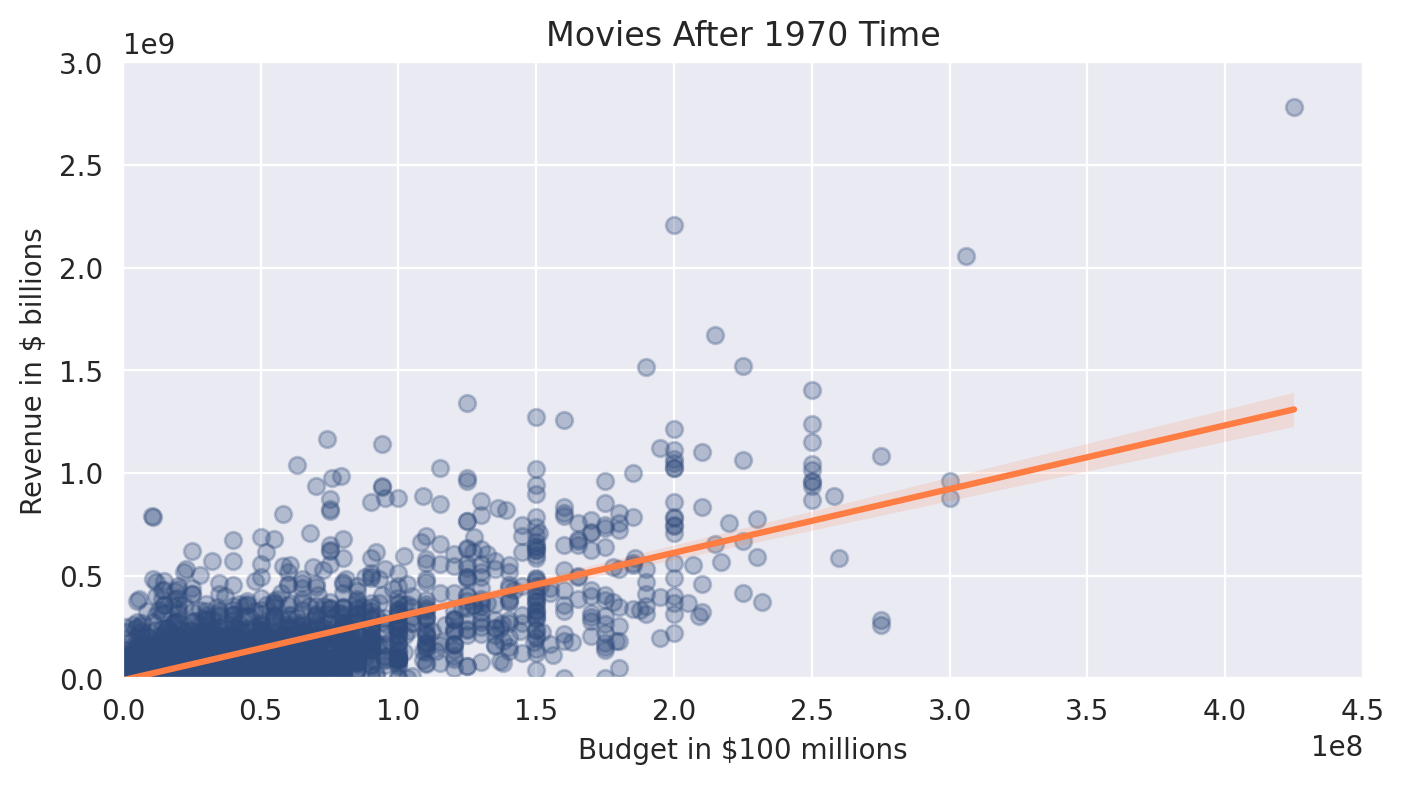

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  regplot_new = sns.regplot(data=new_films,
                        x='USD_Production_Budget',
                        y='USD_Worldwide_Gross',
                        color= '#2f4b7c',
                        scatter_kws = {'alpha': 0.3},
                        line_kws = {'color': '#ff7c43'})

  regplot_new.set(ylim=(0, 3000000000),
                  xlim=(0, 450000000),
                  xlabel='Budget in $100 millions',
                  ylabel='Revenue in $ billions')

plt.title("Movies After 1970 Time")

plt.show()

INSIGHT --> This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that **our data points line up much better with our regression line** (pun intended). Also, **the confidence interval is much narrower**. [what is confidence interval?](https://images.app.goo.gl/KCnxszpxLiaPoEMBA)

Roughly how much would a film with a budget of $150 million make according to the regression line?

= We also see that a film with a **USD150 million budget** is predicted to make slightly under **$500 million by our regression line**.

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But **how much of the variation in revenue does the budget actually explain**? And **how much extra revenue can we expect for an additional $1 increase in the budget**? To find out, we need to dive into the numbers underlying our regression model.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). **The line's intercept** on the y-axis tells us how much revenue a movie would make if the budget was 0. **The slope** tells us how much extra revenue we get for a $1 increase in the movie budget.

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-16_15-31-02-3bdbeb669ce3d7ecebe72abb986e8d35.png'>

In [ ]:
regression = LinearRegression()

In [ ]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [ ]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [ ]:
# Theta zero or intercept's line
regression.intercept_

array([-8325374.61283848])

In [ ]:
# Theta one or slope
regression.coef_

array([[3.10263154]])

INSIGHT --> How do we interpret the y-intercept? Literally, means that if a movie budget is USD0, the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. **After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points** (rather than at the extreme left or right).


What about the slope? The slope tells us that for **every extra USD1 in the budget, movie revenue increases by USD3.1**. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

**R-Squared: Goodness of Fit**

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

In [ ]:
# R-squared
regression.score(X, y)

0.5531141317645796

INSIGHT --> We see that our r-squared comes in at around 0.558. This means that **our model explains about 56% of the variance in movie revenue**. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
regression_2 = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X2 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y2 = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

regression_2.fit(X2, y2)

LinearRegression()

In [ ]:
print(f"intercept's line for old films is: {regression_2.intercept_}")
print(f"slope for old films is: {regression_2.coef_}")
print(f"R-squared for old films is: {regression_2.score(X2, y2)}")

intercept's line for old films is: [22981334.56947669]
slope for old films is: [[1.63861603]]
R-squared for old films is: 0.02903470484442905


INSIGHT --> Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since **the slope (our theta-one) is 1.6**, but **the r-squared is very low (only 3%)**.

This makes sense considering how poorly our data points aligned with our line earlier.
<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-16_16-43-08-86be88ceaa656f3a0c07f04d3cf0dac7.png">

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
a_film_revenue = 22821538 + 1.64771314 * 350000000
print(a_film_revenue)

599521137.0


For a USD350 million budget film, our model predicts a worldwide revenue of around $600 million!

In [ ]:
budget = 350000000
revenue_estimate = regression_2.intercept_[0] + regression_2.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a USD350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $596000000.0.
